In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv(r'.\data\Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.set_index("Id", inplace=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
Features = data[['PetalLengthCm', 'PetalWidthCm']]
target = data[['Species']]

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
target = encoder.fit_transform(target.values.ravel())

In [6]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
    Features, target,
    test_size=0.25, random_state=42)

In [7]:
from sklearn.naive_bayes import  GaussianNB

model =  GaussianNB()
model.fit(xtrain, ytrain)

GaussianNB()

In [8]:
ypred = model.predict(xtest)
ypred == ytest

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


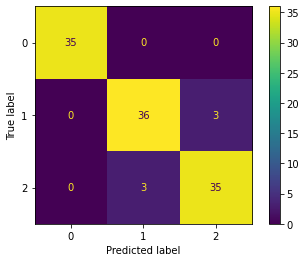

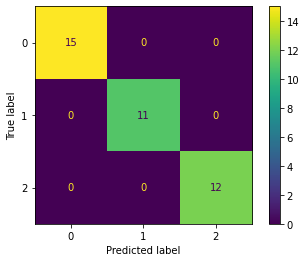

In [9]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score
plot_confusion_matrix(model, xtrain, ytrain)
plot_confusion_matrix(model, xtest, ytest)

In [10]:
encoder.inverse_transform(np.array([0,1,2]))

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(model, Features, target.ravel(), cv=10)

In [12]:
cv.mean()

0.96

C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


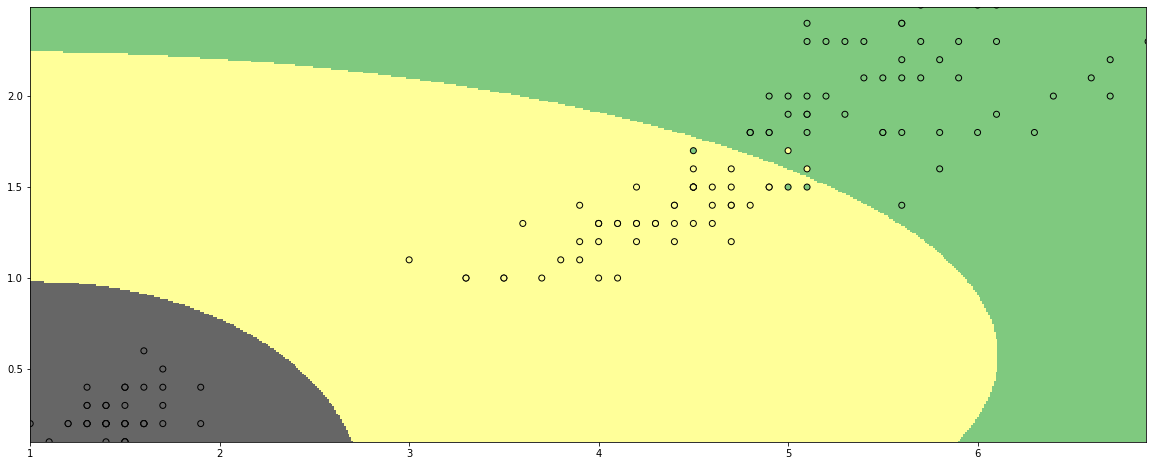

In [13]:
bmodel = model
bmodel.fit(Features, target)
# Visualization

xmin, xmax = Features.values[:, 0].min(), Features.values[:, 0].max()
ymin, ymax = Features.values[:, 1].min(), Features.values[:, 1].max()

xx, yy = np.meshgrid(np.arange(xmin, xmax, 0.01), np.arange(ymin, ymax, 0.01))
xx.shape, yy.shape

xtest = np.c_[xx.ravel(), yy.ravel()]
xtest.shape
ypred = model.predict(xtest)
ypred = ypred.reshape(yy.shape)
ypred

plt.figure(1, figsize=(20,8))
plt.set_cmap(plt.cm.Accent_r)
plt.pcolormesh(xx, yy, ypred, shading='auto')

plt.scatter(Features.values[:, 0], Features.values[:, 1], c=target, edgecolors='black')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


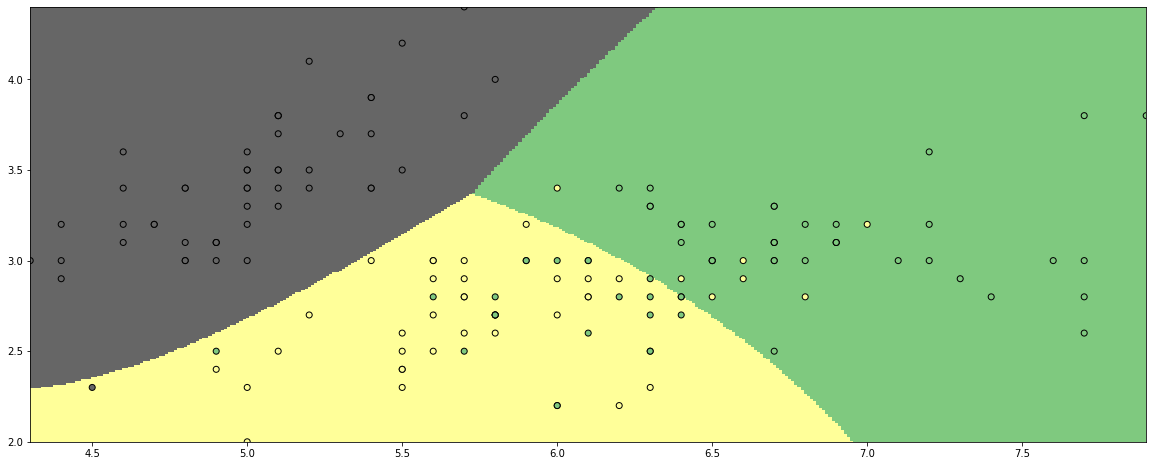

In [14]:
bmodel = model
Features = data[["SepalLengthCm", "SepalWidthCm"]]
bmodel.fit(Features, target)
# Visualization

xmin, xmax = Features.values[:, 0].min(), Features.values[:, 0].max()
ymin, ymax = Features.values[:, 1].min(), Features.values[:, 1].max()

xx, yy = np.meshgrid(np.arange(xmin, xmax, 0.01), np.arange(ymin, ymax, 0.01))
xx.shape, yy.shape

xtest = np.c_[xx.ravel(), yy.ravel()]
xtest.shape
ypred = model.predict(xtest)
ypred = ypred.reshape(yy.shape)
ypred

plt.figure(1, figsize=(20,8))
plt.set_cmap(plt.cm.Accent_r)
plt.pcolormesh(xx, yy, ypred, shading='auto')

plt.scatter(Features.values[:, 0], Features.values[:, 1], c=target, edgecolors='black')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()